In [8]:
from google.colab import files # Corrected import statement
import pandas as pd

uploaded = files.upload() # Called the function to initiate file upload


Saving income_pattern.csv to income_pattern (3).csv


In [11]:
import io

# The 'uploaded' variable contains a dictionary of uploaded files.
# We assume you want to read the file 'income_pattern (3).csv'.
# Get the content of the uploaded file as bytes.
file_content_bytes = uploaded['income_pattern (3).csv']

# Read the CSV file from the byte content using io.BytesIO
df = pd.read_csv(io.BytesIO(file_content_bytes))

In [13]:
import numpy as np
# 2. Identify variables [cite: 9]
print("Numerical Columns:", df.select_dtypes(include=[np.number]).columns.tolist())
print("Categorical Columns:", df.select_dtypes(exclude=[np.number]).columns.tolist())

Numerical Columns: ['Annual_Income', 'Spending_Score']
Categorical Columns: []


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setup for Plotting
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2486992305.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit\n$\mu={mu:.2f}, \sigma={std:.2f}$'
/tmp/ipython-input-2486992305.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit\n$\mu={mu:.2f}, \sigma={std:.2f}$'


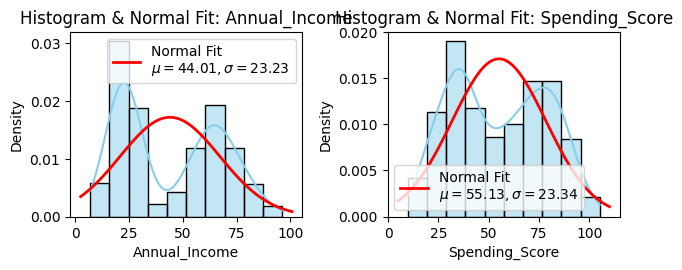

In [16]:
import numpy as np # Added for norm.fit and norm.pdf
from scipy.stats import norm # Import norm for normal distribution functions
# 3. Histograms with Normal Distribution Fit [cite: 10, 14]
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, stat="density", color='skyblue')

    # Fit normal distribution curve
    mu, std = norm.fit(df[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit\n$\mu={mu:.2f}, \sigma={std:.2f}$'
)
    plt.title(f'Histogram & Normal Fit: {col}')
    plt.legend()

plt.tight_layout()
plt.show()

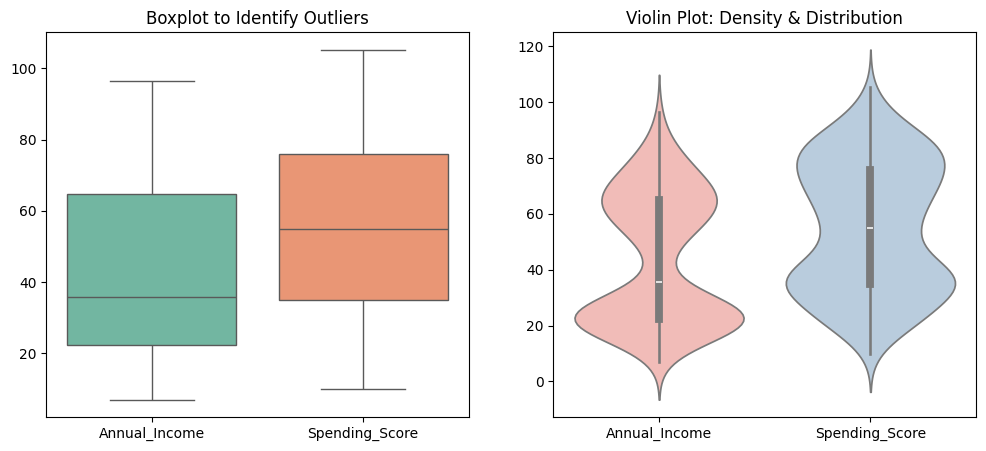

In [17]:
# 4. Boxplots and Violin plots [cite: 11, 12]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot to Identify Outliers")

plt.subplot(1, 2, 2)
sns.violinplot(data=df, palette="Pastel1")
plt.title("Violin Plot: Density & Distribution")
plt.show()

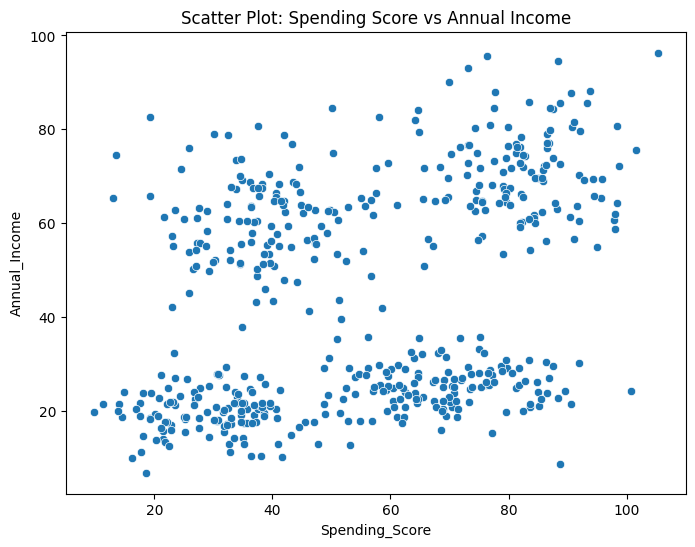

In [18]:
# 5. Scatter Plot [cite: 13]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spending_Score', y='Annual_Income', data=df)
plt.title("Scatter Plot: Spending Score vs Annual Income")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 6. Linear Regression Model [cite: 15, 16]
# Preparing Data
X = df[['Spending_Score']] # Feature
y = df['Annual_Income']    # Target

# Split dataset into 80% Training and 20% Testing [cite: 15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Fit Model [cite: 16]
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import r2_score, mean_squared_error # Import evaluation metrics

# 7. Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n--- Model Performance ---")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


--- Model Performance ---
R-squared Score: 0.0922
Mean Squared Error: 448.1485
